In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("lending-club-data1a.csv")

In [2]:
df.head(5)

loan_amnt        term  int_rate  credit  emp_length home_ownership  \
0       5650   36 months     18.85       3           4       MORTGAGE   
1      20000   60 months     18.25       3           1           RENT   
2       6000   60 months     16.82       2           2           RENT   
3      30000   60 months     24.50       1           8       MORTGAGE   
4      24000   36 months     11.49       5           4       MORTGAGE   

   annual_inc    dti  bad_loans  
0     58000.0  29.61          1  
1    102000.0   9.26          1  
2     44301.0  17.77          1  
3    111000.0  21.24          1  
4     92000.0  24.74          0

In [3]:
df['term'] = df['term'].str.split().str[0]
mapping = {"RENT": 1, "MORTGAGE":2, "OWN":3, "OTHER": 0}
df['home_ownership'] = df['home_ownership'].map(mapping)
df.head()

loan_amnt term  int_rate  credit  emp_length  home_ownership  annual_inc  \
0       5650   36     18.85       3           4               2     58000.0   
1      20000   60     18.25       3           1               1    102000.0   
2       6000   60     16.82       2           2               1     44301.0   
3      30000   60     24.50       1           8               2    111000.0   
4      24000   36     11.49       5           4               2     92000.0   

     dti  bad_loans  
0  29.61          1  
1   9.26          1  
2  17.77          1  
3  21.24          1  
4  24.74          0

In [4]:
#normalize columns using sci-kitlearn minmaxscaler
scaler = MinMaxScaler()
x_df=df.drop(columns=['bad_loans'])
normalized_x = scaler.fit_transform(x_df)
x_normalized = pd.DataFrame(normalized_x, columns=x_df.columns)
x_normalized.head()

loan_amnt  term  int_rate    credit  emp_length  home_ownership  \
0   0.149275   0.0  0.650678  0.500000    0.363636        0.666667   
1   0.565217   1.0  0.621609  0.500000    0.090909        0.333333   
2   0.159420   1.0  0.552326  0.333333    0.181818        0.333333   
3   0.855072   1.0  0.924419  0.166667    0.727273        0.666667   
4   0.681159   0.0  0.294089  0.833333    0.363636        0.666667   

   annual_inc       dti  
0    0.031461  0.847453  
1    0.056180  0.265026  
2    0.023765  0.508586  
3    0.061236  0.607899  
4    0.050562  0.708071

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, df['bad_loans'], test_size=0.2, random_state=123)

In [7]:
def updateWeight(learningRate, weight, x, y):
    #Logistic Regression
    z = np.dot(x, weight)
    y_pred = 1 / (1 + np.exp(-z))

    #gradient decent
    m = len(x)
    gradient = 1/m * np.dot((y_pred-y),x)
    weight = weight - learningRate * gradient
    return weight

def cost_function(y, x, weight):
    #Logistic Regression
    z = np.dot(x, weight)
    y_pred = 1 / (1 + np.exp(-z))
    
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
    return cost

iteration = 2000
learningRate = 0.1
costPerIteration = np.zeros(iteration)

weight = [random.uniform(0, 0.1) for _ in range(9)]
X = X_train
Y = y_train

# #add bias column to input X
X = np.c_[np.ones((X.shape[0], 1)), X]

#updating the weight using gradient decent with iteration = 2000 and learning Rate = 0.05
for it in range(iteration):
    weight = updateWeight(learningRate, weight, X, Y)
    costPerIteration[it] = cost_function(Y, X, weight)

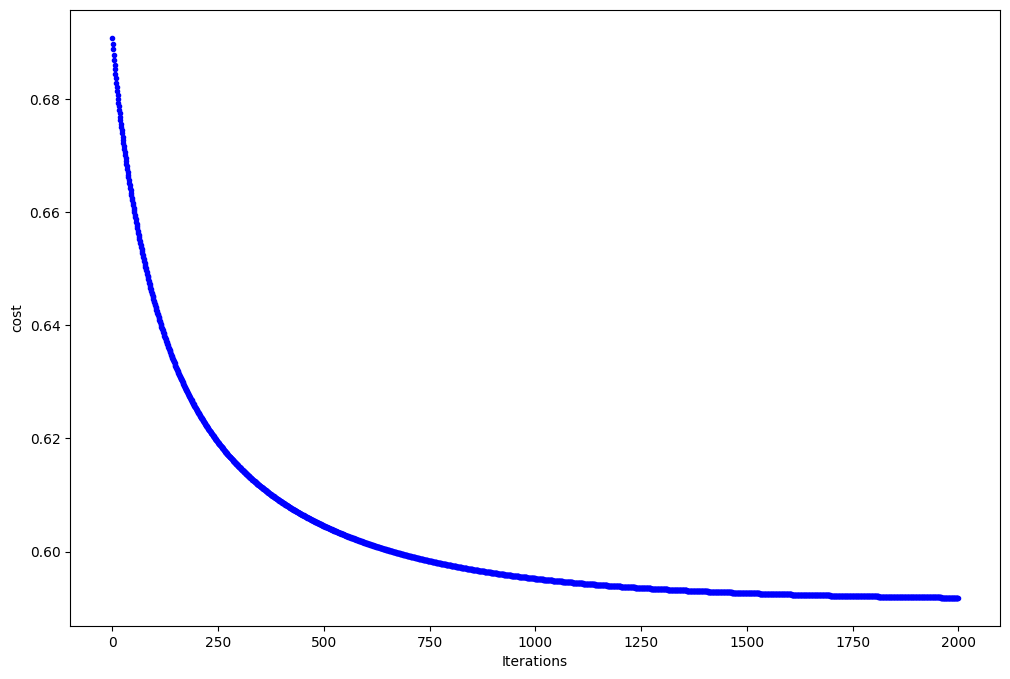

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration), costPerIteration,'b.')

In [9]:
def confusion_matrix(y, y_pred, threshold):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind]>= threshold):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind]< threshold):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1

    accuracy = (tp + tn)/(fp + fn + tp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 / ((1 / precision) + (1 / recall))
    
    print(f"true positive: {tp}, false positive: {fp}\ntrue negative: {tn}, false negative: {fn}\n")
    print(f"accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"F1 = {F1}\n")

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
z = np.dot(X_train, weight)
y_train_pred = 1 / (1 + np.exp(-z))
y_train = y_train.reset_index(drop=True)
confusion_matrix(y_train, y_train_pred, 0.5)


X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
z = np.dot(X_test, weight)
y_test_pred = 1 / (1 + np.exp(-z))
y_test = y_test.reset_index(drop=True)
confusion_matrix(y_test, y_test_pred, 0.5)

true positive: 5326, false positive: 2320
true negative: 5668, false negative: 2686

accuracy = 0.687125
precision = 0.6965733716976197
recall = 0.664752870693959
F1 = 0.6802912249329416

true positive: 1286, false positive: 519
true negative: 1493, false negative: 702

accuracy = 0.69475
precision = 0.7124653739612188
recall = 0.6468812877263581
F1 = 0.6780912206696547



AUC: -0.753308619110288


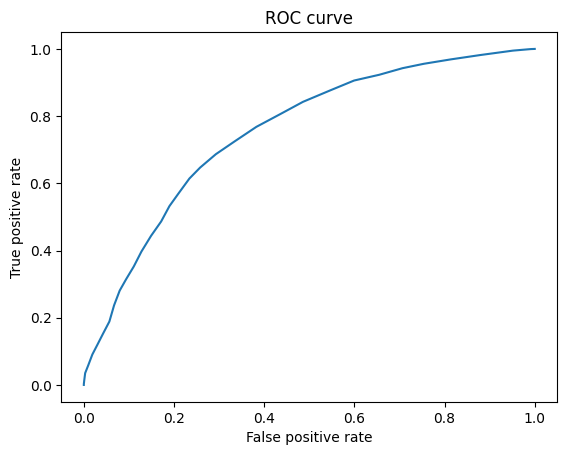

In [10]:
def get_true_false_positive(y, y_pred, threshold):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind]>= threshold):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind]< threshold):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1
    tpr = tp / (tp+fn)
    fpr = fp / (tn+fp)
    return tpr, fpr

def calculate_area(x, y):
    area = 0
    for i in range(1, len(x)):
        wid = x[i] - x[i-1]
        height = (y[i] + y[i-1])/2
        area += wid * height
    return area

def roc(y, y_pred, thresholds):
    tpr = np.zeros(len(thresholds))
    fpr = np.zeros(len(thresholds))
    for i in range(len(thresholds)):
        tpr[i], fpr[i] = get_true_false_positive(y, y_pred, thresholds[i])
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    area = calculate_area(fpr, tpr)
    print(f"AUC: {area}")


step = 0.025
thresholds = [i * step for i in range(int(1 / step) + 1)]
roc(y_test, y_test_pred, thresholds)

In [11]:
df = pd.read_csv("lending-club-data2a.csv")
df.head(10)

loan_amnt        term  int_rate credit emp_length home_ownership  \
0      25975   60 months     16.77      D  10+ years       MORTGAGE   
1       5000   36 months     14.09      B  10+ years            OWN   
2      10000   36 months     10.16      B  10+ years       MORTGAGE   
3      16000   60 months     16.29      C    5 years       MORTGAGE   
4       7700   36 months     15.61      C    9 years       MORTGAGE   
5      10000   36 months     14.64      C  10+ years           RENT   
6       9775   36 months     19.99      E   < 1 year           RENT   
7      21200   36 months     13.11      B   < 1 year       MORTGAGE   
8      10000   36 months     14.47      C  10+ years       MORTGAGE   
9       6700   36 months     14.16      C    2 years       MORTGAGE   

   annual_inc             purpose    dti  bad_loans  
0    110000.0  debt_consolidation  22.32          1  
1     32000.0  debt_consolidation  27.34          1  
2     53000.0  debt_consolidation  23.80          1  
3     75000.0  debt_consolidation  14.93          1  
4     60000.0  debt_consolidation  29.78          0  
5    108000.0  debt_consolidation   6.20          0  
6    114000.0               house   2.65          0  
7     60000.0    home_improvement  25.29          1  
8    149000.0  debt_consolidation  17.17          0  
9     45000.0  debt_consolidation  11.09          1

In [12]:
label_encoder = LabelEncoder()

df['term'] = df['term'].str.split().str[0]
df['emp_length'] = df['emp_length'].replace('10+ years', '10 year')
df['emp_length'] = df['emp_length'].replace('< 1 year', '0 year')
df['emp_length'] = df['emp_length'].str.split().str[0]


# df['emp_length'] = df['emp_length'].map({'10+': '10'})
# mapping = {"RENT": 1, "MORTGAGE":2, "OWN":3, "OTHER": 0}
# df['home_ownership'] = df['home_ownership'].map(mapping)
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['credit'] = label_encoder.fit_transform(df['credit'])

purpose_col = df[['purpose']]
encoder = OneHotEncoder()
encoder.fit(purpose_col)
encoded_column = encoder.transform(purpose_col).toarray()
encoded_df = pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(['purpose']))



df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['purpose'])
df.head(10)

loan_amnt term  int_rate  credit emp_length  home_ownership  annual_inc  \
0      25975   60     16.77       3         10               0    110000.0   
1       5000   36     14.09       1         10               2     32000.0   
2      10000   36     10.16       1         10               0     53000.0   
3      16000   60     16.29       2          5               0     75000.0   
4       7700   36     15.61       2          9               0     60000.0   
5      10000   36     14.64       2         10               3    108000.0   
6       9775   36     19.99       4          0               3    114000.0   
7      21200   36     13.11       1          0               0     60000.0   
8      10000   36     14.47       2         10               0    149000.0   
9       6700   36     14.16       2          2               0     45000.0   

     dti  bad_loans  purpose_car  ...  purpose_debt_consolidation  \
0  22.32          1          0.0  ...                         1.0   
1  27.34          1          0.0  ...                         1.0   
2  23.80          1          0.0  ...                         1.0   
3  14.93          1          0.0  ...                         1.0   
4  29.78          0          0.0  ...                         1.0   
5   6.20          0          0.0  ...                         1.0   
6   2.65          0          0.0  ...                         0.0   
7  25.29          1          0.0  ...                         0.0   
8  17.17          0          0.0  ...                         1.0   
9  11.09          1          0.0  ...                         1.0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                       0.0            0.0                     0.0   
1                       0.0            0.0                     0.0   
2                       0.0            0.0                     0.0   
3                       0.0            0.0                     0.0   
4                       0.0            0.0                     0.0   
5                       0.0            0.0                     0.0   
6                       0.0            1.0                     0.0   
7                       1.0            0.0                     0.0   
8                       0.0            0.0                     0.0   
9                       0.0            0.0                     0.0   

   purpose_medical  purpose_moving  purpose_other  purpose_small_business  \
0              0.0             0.0            0.0                     0.0   
1              0.0             0.0            0.0                     0.0   
2              0.0             0.0            0.0                     0.0   
3              0.0             0.0            0.0                     0.0   
4              0.0             0.0            0.0                     0.0   
5              0.0             0.0            0.0                     0.0   
6              0.0             0.0            0.0                     0.0   
7              0.0             0.0            0.0                     0.0   
8              0.0             0.0            0.0                     0.0   
9              0.0             0.0            0.0                     0.0   

   purpose_vacation  purpose_wedding  
0               0.0              0.0  
1               0.0              0.0  
2               0.0              0.0  
3               0.0              0.0  
4               0.0              0.0  
5               0.0              0.0  
6               0.0              0.0  
7               0.0              0.0  
8               0.0              0.0  
9               0.0              0.0  

[10 rows x 21 columns]

In [14]:
x_df = df.drop(columns=['bad_loans'])
X_train, X_test, y_train, y_test = train_test_split(x_df, df['bad_loans'], test_size=0.2, random_state=123)

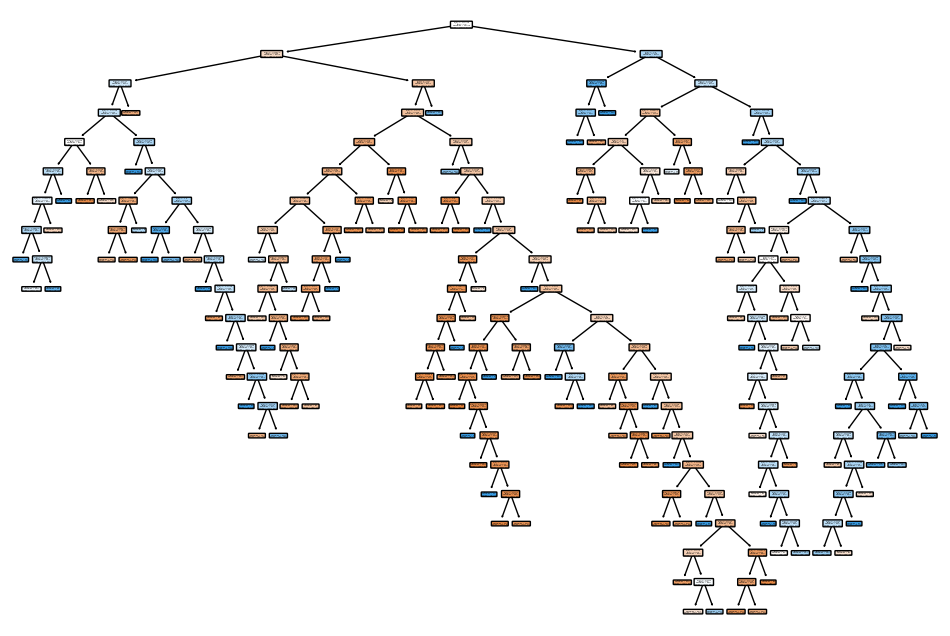

In [21]:
decision_tree = tree.DecisionTreeClassifier(min_samples_split=250)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True, rounded=True)
plt.show()

In [22]:
y_train_pred = decision_tree.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)

Accuracy: 0.8139375


In [25]:
def confusion_matrix_dt(y, y_pred):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind]== 1):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind]== 0):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1

    accuracy = (tp + tn)/(fp + fn + tp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 / ((1 / precision) + (1 / recall))
    
    print(f"true positive: {tp}, false positive: {fp}\ntrue negative: {tn}, false negative: {fn}\n")
    print(f"accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"F1 = {F1}\n")

print("train dataset:")
y_train = y_train.reset_index(drop=True)
confusion_matrix_dt(y_train, y_train_pred)

print("\ntest dataset:")
y_test = y_test.reset_index(drop=True)
confusion_matrix_dt(y_test, y_test_pred)

train dataset:
true positive: 5793, false positive: 760
true negative: 7230, false negative: 2217

accuracy = 0.8139375
precision = 0.8840225850755379
recall = 0.7232209737827715
F1 = 0.795577834237451


test dataset:
true positive: 1405, false positive: 203
true negative: 1807, false negative: 585

accuracy = 0.803
precision = 0.8737562189054726
recall = 0.7060301507537688
F1 = 0.7809894385769872



AUC: 0.0033528919715212417


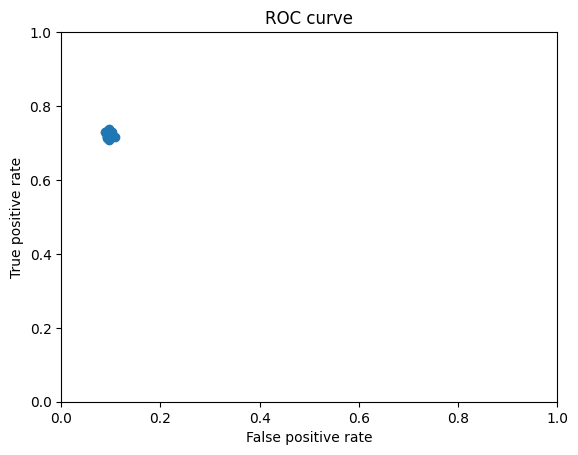

In [45]:
def get_true_false_positive_dt(y, y_pred):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind] == 1):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind] == 0):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1
    tpr = tp / (tp+fn)
    fpr = fp / (tn+fp)
    return tpr, fpr

def calculate_area_dt(x, y):
    area = 0
    for i in range(1, len(x)):
        wid = x[i] - x[i-1]
        height = (y[i] + y[i-1])/2
        area += wid * height
    return area

def roc_dt(y, y_pred, m):
    tpr = np.zeros(m)
    fpr = np.zeros(m)
    for i in range(m):
        tpr[i], fpr[i] = get_true_false_positive_dt(y[i], y_pred[i])
    plt.scatter(fpr, tpr)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    area = calculate_area_dt(fpr, tpr)
    print(f"AUC: {area}")

subset_count = 20
y_random_subset = []
y_random_subset_pred = []

for i in range(subset_count):
    random_subset = df.sample(4000)
    random_subset = random_subset.reset_index(drop=True)
    y_random_subset.append(random_subset['bad_loans'])
    x_random_subset = random_subset.drop(columns=['bad_loans'])
    y_random_subset_pred.append(decision_tree.predict(x_random_subset))

roc_dt(y_random_subset, y_random_subset_pred, subset_count)